Create a plot, of whatever data (and models if you want) you choose from data of urban relevance (you can use any dataset we used in class, or something else, use your judgement here, but please no footbal statistics, or star flares. If you have doubt about whether your dataset is relevant for this homework please email me.) You can make the plot in any coding language you want (e.g. python, javascript, R...), as long as you upload the code that generates the plot onto this repo (which means no tableau, or any other non reproducible - carto is an exception, since you can see the processing tasks).

Create a directory HW8_ in your PUI repo (with your netID). The plot neads to be uploaded onto the HW8 folder in your github PUI repo and be embedded in the README.md. That means: when I click on the HW8 link the plot must be rendered in the front page of the repo. Your readme must contain the plot, and a brief caption. If it is an interactive graphic, upload a static image of it in the README and provide a link to the interactive version.

Please make an effor to make it a good, compelling graphic. Put though into the esthetic of the plot, how clearly the content is communicated, avoid clutter, avoid misleading elements, mind your choice of colors accordingly to what was discussed in class.

Each of you needs to upload their own plot, no group submissions.

If your plot shows up as I described above in the repo and the code is also uploaded you will get 100% of the HW points. (Next week you will be tasked to review 3 plots of your classmates and you will be graded on the quality of the review.)



In [1]:
import pandas as pd
import numpy as np
import urllib
import requests
import os
import io
import json
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib

In [3]:
if os.getenv("PUIDATA") is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
else:
    pass
print(os.getenv("PUIDATA"))

/nfshome/sg5718/PUIdata


In [4]:
url = urllib.urlretrieve('https://data.cityofnewyork.us/resource/waf7-5gvc.csv',
                          'WaterConsumption.csv')
!mv WaterConsumption.csv $PUIDATA

In [5]:
wcny = pd.read_csv("%s/WaterConsumption.csv"%os.getenv("PUIDATA"))
wcny.head()

,new_york_city_population,nyc_consumption_million_gallons_per_day,per_capita_gallons_per_person_per_day,year
0,7102100.0,1512.0,213,1979
1,7071639.0,1506.0,213,1980
2,7089241.0,1309.0,185,1981
3,7109105.0,1382.0,194,1982
4,7181224.0,1424.0,198,1983


In [6]:
wcny.rename(columns = {'year':'Year', 
               'new_york_city_population':'NYC Population', 
               'per_capita_gallons_per_person_per_day': 'Water Consumption Per Capita(gallons)'}, inplace=True)

In [7]:
wcny = wcny[['Year', 'Water Consumption Per Capita(gallons)']]
wcny.head()

,Year,Water Consumption Per Capita(gallons)
0,1979,213
1,1980,213
2,1981,185
3,1982,194
4,1983,198


In [8]:
wcny.describe()

,Year,Water Consumption Per Capita(gallons)
count,39.000000,39.000000
mean,1998.000000,160.307692
std,11.401754,31.930973
min,1979.000000,115.000000
25%,1988.500000,133.500000
50%,1998.000000,155.000000
75%,2007.500000,188.000000
max,2017.000000,213.000000


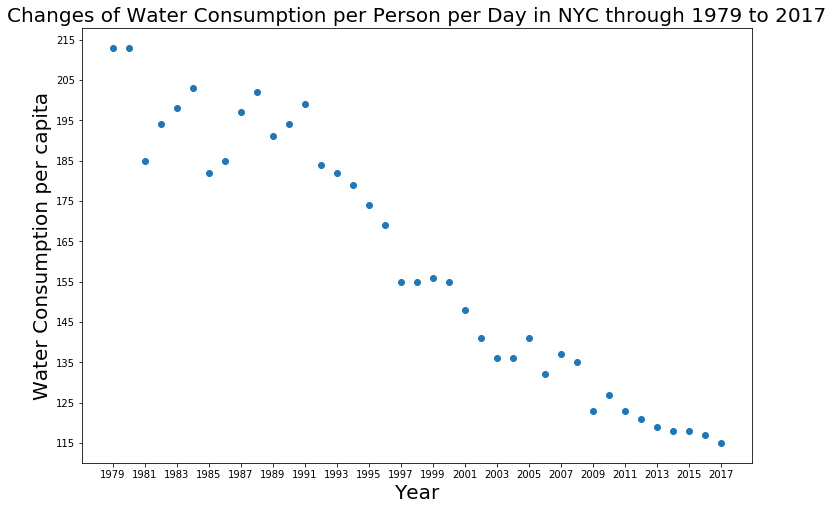

In [20]:
figure = plt.figure(figsize=(12, 8))
plt.scatter(x=wcny["Year"], y=wcny["Water Consumption Per Capita(gallons)"])
plt.title("Changes of Water Consumption per Person per Day in NYC through 1979 to 2017", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Water Consumption per capita", fontsize=20)
plt.yticks(np.arange(115, 220, 10.0))
plt.xticks(np.arange(1979, 2018, 2.0))
plt.show()

### Obviously, in general, water consumption per capita decreased during the period between 1979 and 2017.